In [1]:
%matplotlib inline
import re

import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# matplotlibの文字化け対応
try:
    import japanize_matplotlib
except ImportError:
    raise

# seabornの文字化け対応
sns.set(font='IPAexGothic')
# sns.palplot(sns.hls_palette(24))


# See https://note.nkmk.me/python-pandas-option-display/
# pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 150)
pd.set_option('display.unicode.east_asian_width', True)

matplotlib.style.use('ggplot')

df = pd.read_csv("Django パッケージ利用実態調査アンケート（2022年版）（回答） - フォームの回答 1.csv")
df

,タイムスタンプ,Q1．Django の経験はどのくらいですか？,Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-database-url (https://pypi.org/project/dj-database-url/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-rest-knox (https://pypi.org/project/django-rest-knox/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-rest-auth (https://pypi.org/project/dj-rest-auth/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-allauth (https://pypi.org/project/django-allauth/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-braces (https://pypi.org/project/django-braces/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-celery (https://pypi.org/project/django-celery/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-celery-beat (https://pypi.org/project/django-celery-beat/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-channels (https://pypi.org/project/channels/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-click (https://pypi.org/project/django-click/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-compressor (https://pypi.org/project/django-compressor/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-configurations (https://pypi.org/project/django-configurations/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-cors-headers (https://pypi.org/project/django-cors-headers/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-crispyforms (https://pypi.org/project/django-crispy-forms/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-dbbackup (https://pypi.org/project/django-dbbackup/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-debug-toolbar (https://pypi.org/project/django-debug-toolbar/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-environ (https://pypi.org/project/django-environ/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-extensions (https://pypi.org/project/django-extensions/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-filter (https://pypi.org/project/django-filter/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-import-export (https://pypi.org/project/django-import-export/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-lifecycle (https://pypi.org/project/django-lifecycle/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-model-utils (https://pypi.org/project/django-model-utils/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-money (https://pypi.org/project/django-money/)],Q2．

In [2]:
df.describe()

,タイムスタンプ,Q1．Django の経験はどのくらいですか？,Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-database-url (https://pypi.org/project/dj-database-url/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-rest-knox (https://pypi.org/project/django-rest-knox/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-rest-auth (https://pypi.org/project/dj-rest-auth/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-allauth (https://pypi.org/project/django-allauth/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-braces (https://pypi.org/project/django-braces/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-celery (https://pypi.org/project/django-celery/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-celery-beat (https://pypi.org/project/django-celery-beat/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-channels (https://pypi.org/project/channels/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-click (https://pypi.org/project/django-click/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-compressor (https://pypi.org/project/django-compressor/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-configurations (https://pypi.org/project/django-configurations/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-cors-headers (https://pypi.org/project/django-cors-headers/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-crispyforms (https://pypi.org/project/django-crispy-forms/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-dbbackup (https://pypi.org/project/django-dbbackup/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-debug-toolbar (https://pypi.org/project/django-debug-toolbar/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-environ (https://pypi.org/project/django-environ/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-extensions (https://pypi.org/project/django-extensions/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-filter (https://pypi.org/project/django-filter/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-import-export (https://pypi.org/project/django-import-export/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-lifecycle (https://pypi.org/project/django-lifecycle/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-model-utils (https://pypi.org/project/django-model-utils/)],Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [django-money (https://pypi.org/project/django-money/)],Q2．

In [3]:
df_grouped = df.groupby('Q1．Django の経験はどのくらいですか？')

# インデックスが経験年数の選択肢、列名が選択肢ごとの合計人数となるDataFrameを作成
df_experience = pd.DataFrame()
df_experience['人数'] = df_grouped.size()
df_experience

,人数
Q1．Django の経験はどのくらいですか？,
1〜3年くらい,2
3〜5年くらい,2
5年以上,4


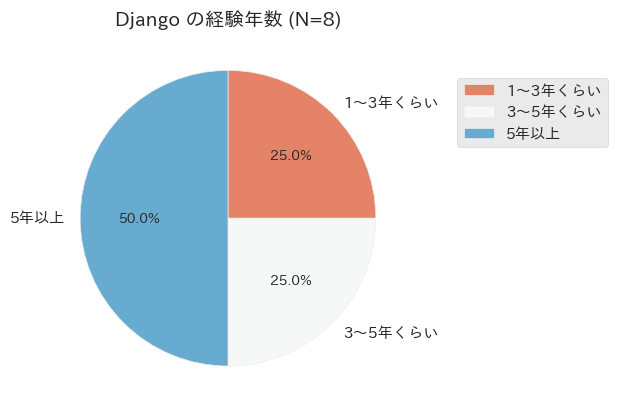

In [4]:
fig, ax = plt.subplots()


# https://jinpei0908.hatenablog.com/entry/2016/11/01/030653
def generate_cmap(color_list=None):
    n = len(color_list) - 1
    return LinearSegmentedColormap.from_list(name='custom', colors=[(i / n, j) for i, j in enumerate(color_list)])


# グラフで使用する色
n_cols = df_experience.shape[0]
# https://qiita.com/kenmatsu4/items/fe8a2f1c34c8d5676df8
# colors = generate_cmap(['mediumblue', 'limegreen', 'orangered'])(np.linspace(0, 1, n_cols))
colors = plt.get_cmap('RdBu')(np.linspace(0.25, 0.75, n_cols))

# 円グラフ
ax.pie(df_experience['人数'].values,
       labels=df_experience.index,
       colors=colors,
       autopct='%.1f%%',
       # 円グラフを開始する角度
       startangle=90,
       # 反時計回りにするかどうか
       counterclock=False)
# タイトル
n = df_experience['人数'].sum()
ax.set_title(f'Django の経験年数 (N={n})', size=14)
# 凡例を表示
ax.legend(bbox_to_anchor=(1.1, 0.9))

In [5]:
def to_package_name(column_name):
    column_name = re.sub('\n', '', column_name)
    package_name = re.match(r'.+\[([^ ]+).+', column_name).group(1)
    return package_name


# Djangoパッケージの質問のみに列を限定して、列名を置換
df_packages = df.iloc[:, 2:].rename(columns=to_package_name)

df_count = pd.DataFrame()
sr_counts = []
package_names = []
for column_name, sr in df_packages.items():
    # print(f'{column_name=}')
    sr_count = sr.value_counts().sort_index()
    # print(f'{sr_count=}')
    sr_counts.append(sr_count)
    package_names.append(column_name)

CHOICES = ['1: 聞いたことがない', '2: 聞いたことはあるが使ったことはない', '3: 使ったことがある', '4: 現場で使っている']

# インデックスがパッケージ名、列名が回答（1.〜4.の選択肢）となるDataFrameを作成
df_count = pd.DataFrame(
    sr_counts,
    index=package_names,
    columns=CHOICES,
)

# NaNを0に変換
df_count = df_count.fillna(0)

# 使われている順にソート
df_count = df_count.sort_values(list(reversed(CHOICES)), ascending=False)
# df_count = df_count.sort_values(['4: 現場で使っている', '3: 使ったことがある', '2: 聞いたことはあるが使ったことはない', '1: 聞いたことがない'], ascending=False)
df_count

,1: 聞いたことがない,2: 聞いたことはあるが使ったことはない,3: 使ったことがある,4: 現場で使っている
djangorestframework,0.0,0.0,2.0,6.0
django-debug-toolbar,1.0,0.0,2.0,5.0
django-cors-headers,0.0,2.0,1.0,5.0
django-filter,2.0,0.0,1.0,5.0
django-storages,2.0,1.0,0.0,5.0
django-redis,0.0,3.0,1.0,4.0
django-environ,0.0,2.0,3.0,3.0
django-extensions,2.0,1.0,2.0,3.0
djangorestframework-simplejwt,3.0,1.0,1.0,3.0
django-silk,4.0,0.0,1.0,3.0


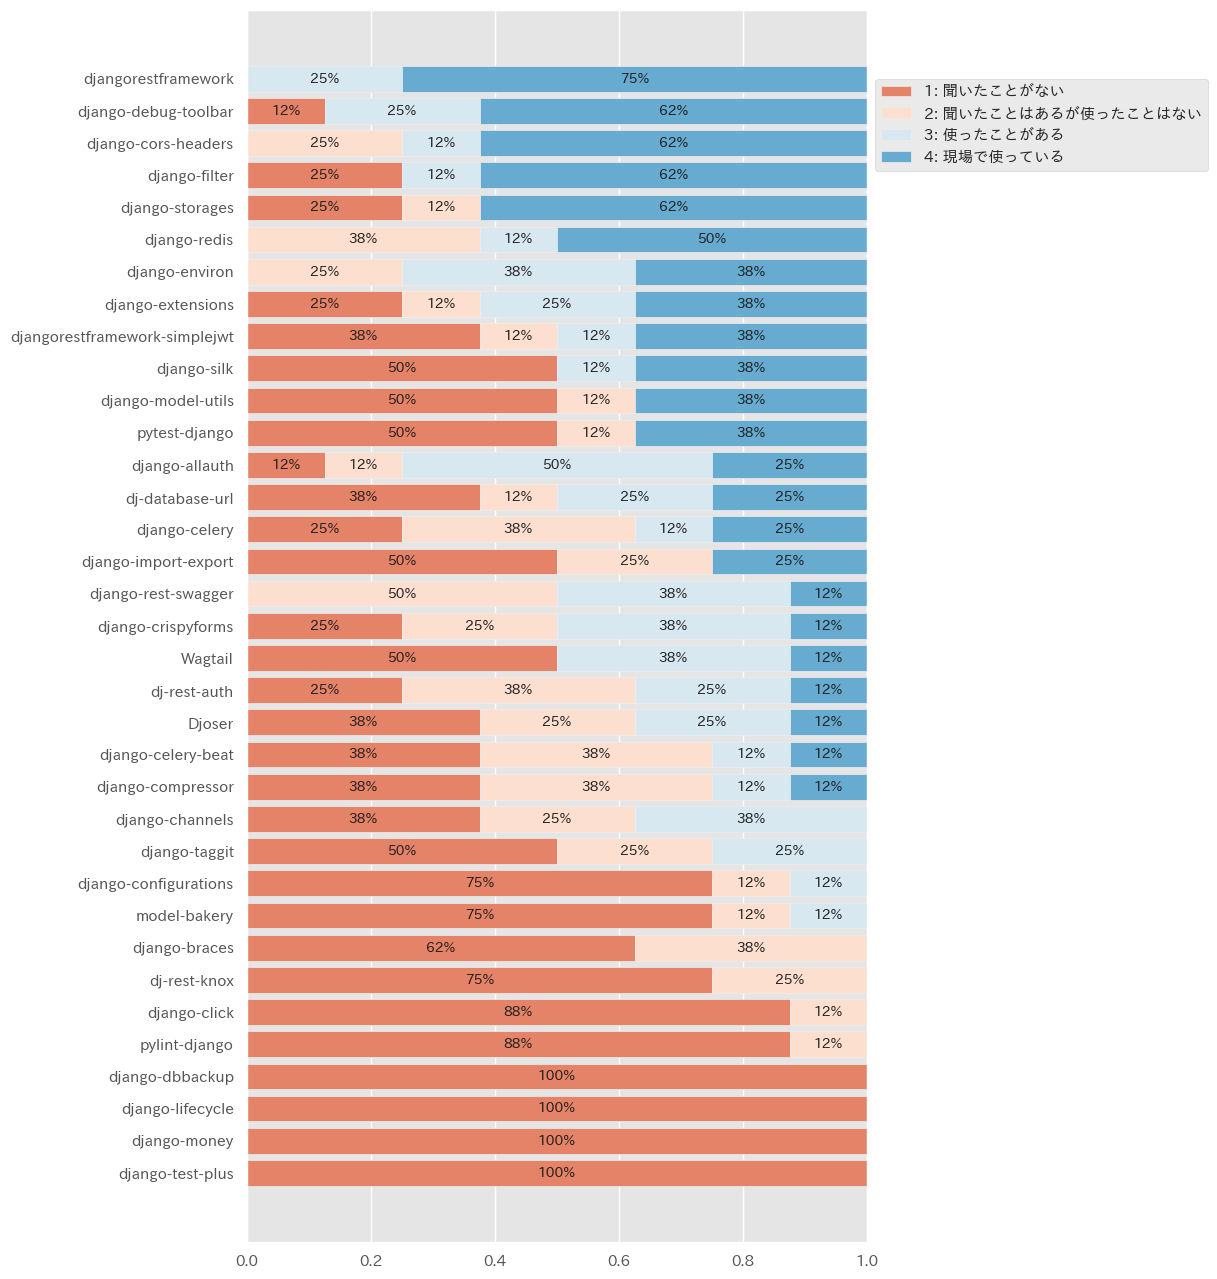

In [6]:
# https://pystyle.info/matplotlib-stacked-bar-chart/

# 正規化する
df_count = df_count.div(df_count.sum(axis=1), axis=0)

n_rows, n_cols = df_count.shape
positions = np.arange(n_rows)
offsets = np.zeros(n_rows, dtype=df_count.values.dtype)

# グラフで使用する色
# https://qiita.com/kenmatsu4/items/fe8a2f1c34c8d5676df8
# colors = generate_cmap(['mediumblue', 'limegreen', 'orangered'])(np.linspace(0, 1, n_cols))
colors = plt.get_cmap('RdBu')(np.linspace(0.25, 0.75, n_cols))

# https://qiita.com/cnloni/items/20b5908fbae755192498
fig, ax = plt.subplots(figsize=(8.0, 16.0))
ax.set_yticks(positions)
ax.set_yticklabels(df_count.index)

for i in range(len(df_count.columns)):
    # 棒グラフを描画する
    bar = ax.barh(
        positions, df_count.iloc[:, i],
        left=offsets,
        color=colors[i],
        label=df_count.columns[i]
    )
    offsets += df_count.iloc[:, i]

    # 棒グラフのラベルを描画する
    for rect, value in zip(bar, df_count.iloc[:, i]):
        cx = rect.get_x() + rect.get_width() / 2
        cy = rect.get_y() + rect.get_height() / 2
        ax.text(cx, cy, f'{value:.0%}' if value > 0 else '', color='k', ha='center', va='center')

# 凡例を表示
ax.legend(bbox_to_anchor=(1, 0.95))
# Y軸を反転させる
# https://pystyle.info/matplotlib-invert-axis/
ax.invert_yaxis()